<a href="https://colab.research.google.com/github/hifistelija/Sup_Learning_Capstone_TreeMethods/blob/main/00_Sup_Learning_Capstone_Tree_Methods_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

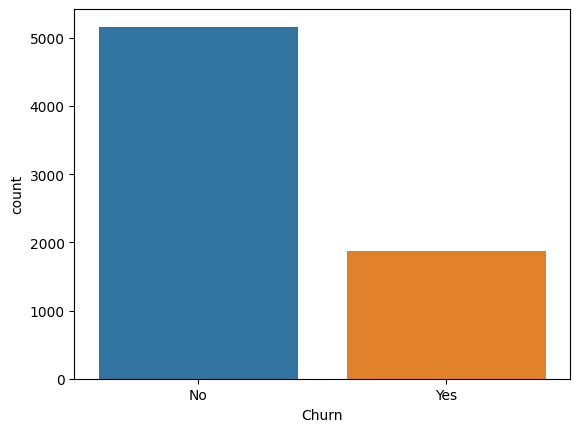

In [8]:
sns.countplot(x='Churn', data=df)

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

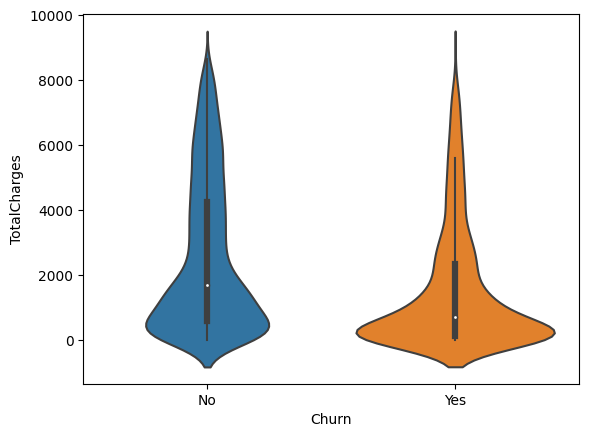

In [9]:
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

sns.violinplot(x='Churn', y='TotalCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

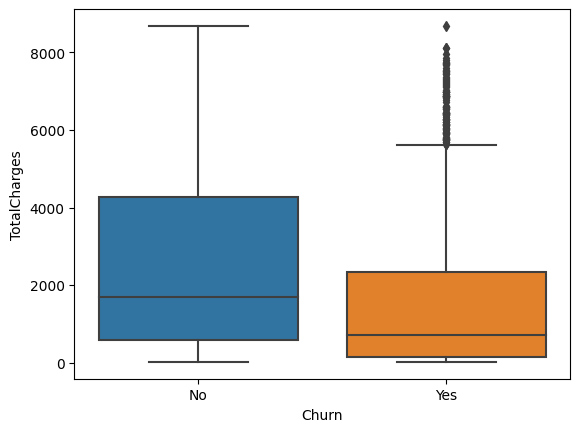

In [10]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

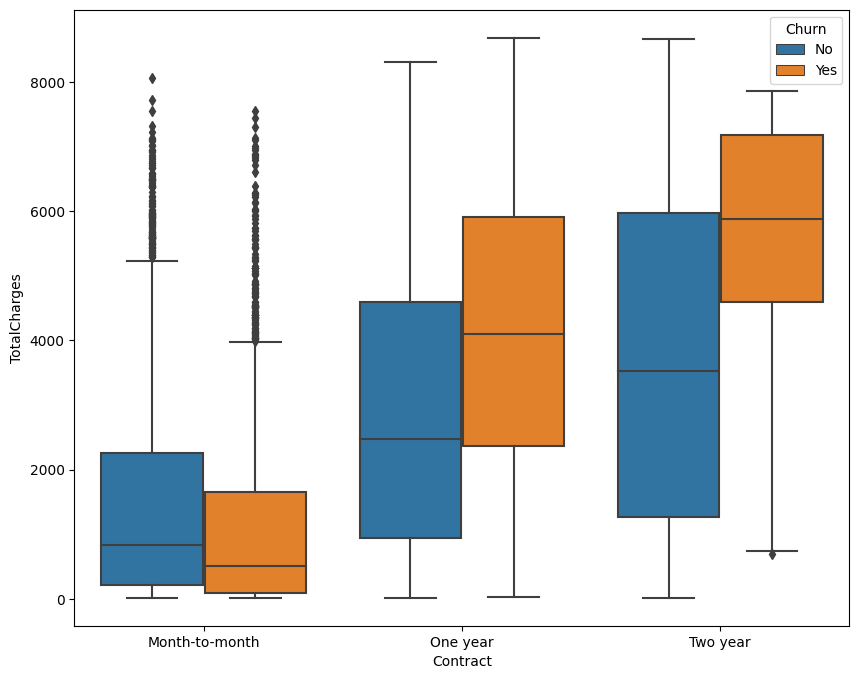

In [11]:
plt.figure(figsize=(10,8), dpi=100)
sns.boxplot(x='Contract', y='TotalCharges', data=df, hue='Churn')

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [12]:
df['Churn'] = df['Churn'].map({
    "No": 0,
    "Yes": 1
})

selected_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

df_dummies = pd.get_dummies(df[selected_features], drop_first=True)
correlation = df_dummies.join(df['Churn']).corr()['Churn'].sort_values()
correlation = correlation.drop('Churn')
correlation

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
OnlineSecurity_No internet service      -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


In [13]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

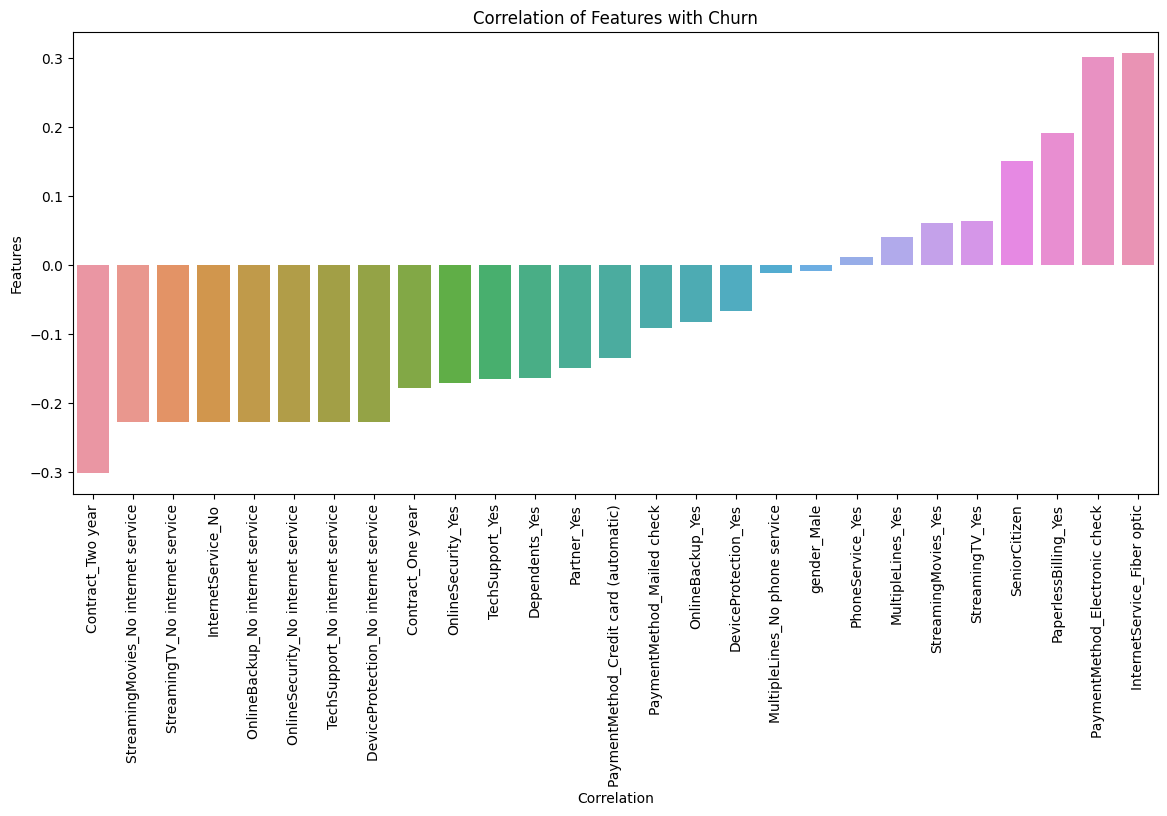

In [14]:
plt.figure(figsize=(14,6), dpi=100)
sns.barplot(y=correlation.values, x=correlation.index)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.xticks(rotation=90);

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

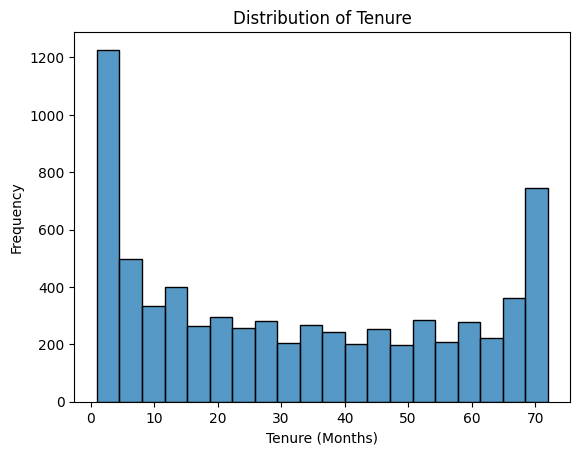

In [16]:
sns.histplot(df['tenure'], bins=20, kde=False)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

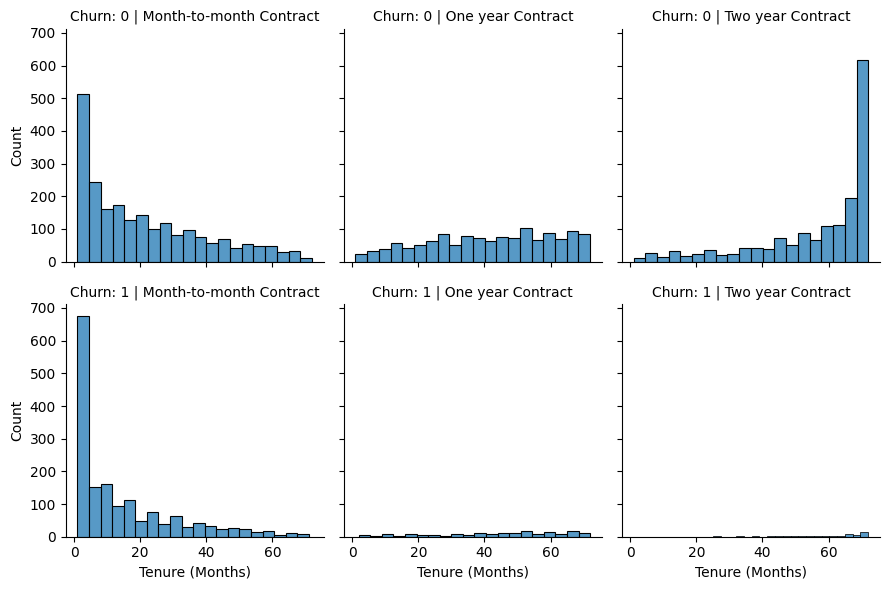

In [17]:
g = sns.FacetGrid(df, col='Contract', row='Churn')
g.map_dataframe(sns.histplot, x='tenure', bins=20)
g.set_axis_labels('Tenure (Months)')
g.set_titles(col_template="{col_name} Contract", row_template="Churn: {row_name}")
plt.show()

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

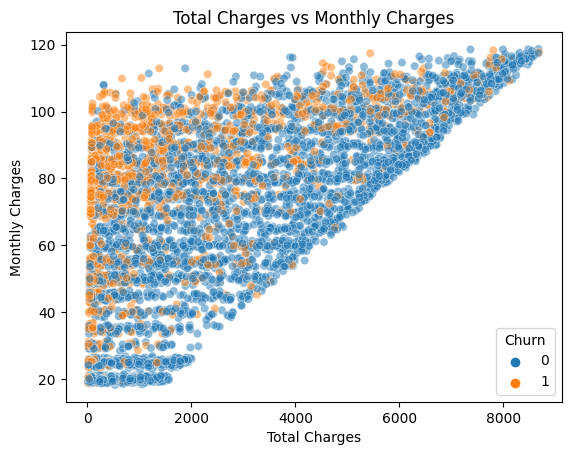

In [19]:
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn', data=df, alpha=0.5)
plt.title('Total Charges vs Monthly Charges')
plt.xlabel('Total Charges')
plt.ylabel('Monthly Charges')
plt.show()

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [20]:
cohort_churn_rate = df.groupby('tenure')['Churn'].mean() * 100
cohort_churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

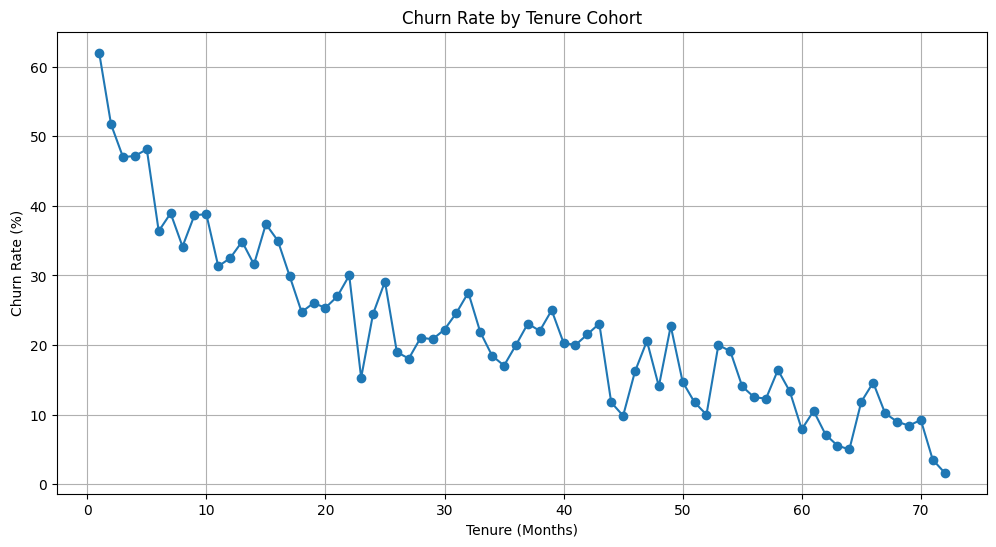

In [21]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(cohort_churn_rate.index, cohort_churn_rate.values, marker='o')
plt.title('Churn Rate by Tenure Cohort')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [22]:
bins = [0, 12, 24, 48, float('inf')]
labels = ['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months']
df['Tenure Cohort'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

In [23]:
df[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

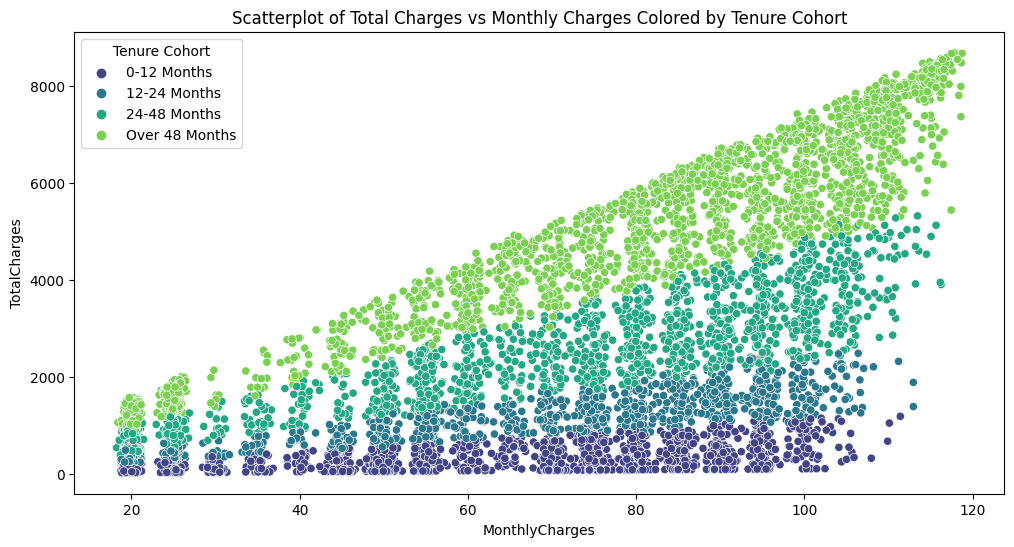

In [24]:
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort',
               hue_order=['0-12 Months', '12-24 Months', '24-48 Months', 'Over 48 Months'],
               palette='viridis')
plt.title('Scatterplot of Total Charges vs Monthly Charges Colored by Tenure Cohort')
plt.show()

Customers with lower monthly charges and shorter tenures might represent a segment that is testing the service but is not yet committed.

Customers with higher monthly charges but shorter tenures could be those who subscribed to more services but churned quickly perhaps due to high costs.

Long-tenure customers with high monthly charges are likely loyal and satisfied customers who see value in the services they are paying for.

Understanding these dynamics can be crucial for customer segmentation and targeted marketing.

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

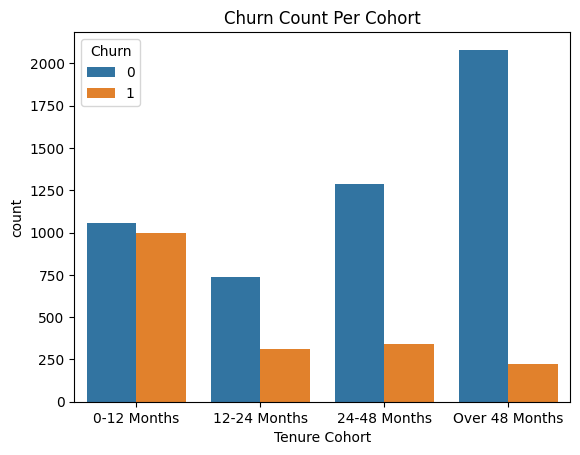

In [25]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')
plt.title('Churn Count Per Cohort')
plt.show()

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

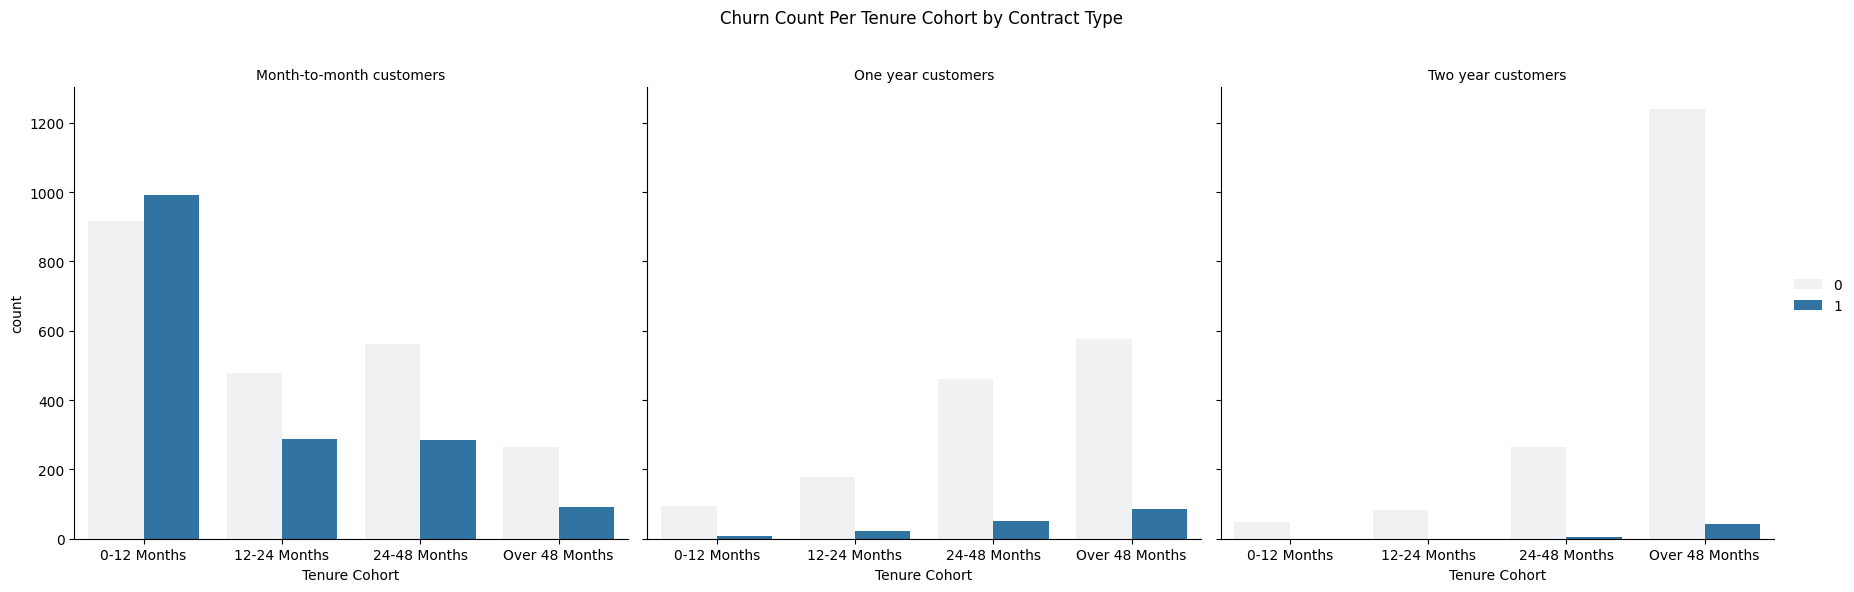

In [26]:
g = sns.FacetGrid(df, col="Contract", height=6, aspect=1)
g.map_dataframe(sns.countplot, x='Tenure Cohort', hue='Churn')

g.set_axis_labels("Tenure Cohort")
g.set_titles(col_template="{col_name} customers")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Churn Count Per Tenure Cohort by Contract Type')
g.add_legend()
plt.show()

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [27]:
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

In [28]:
X = pd.get_dummies(X, drop_first=True)

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [32]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

In [33]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'splitter': ['best', 'random']})

In [35]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}

In [36]:
df_model = DecisionTreeClassifier(**best_params)
df_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')

In [37]:
y_pred = df_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       557
           1       0.50      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.78      0.79      0.79       704



In [39]:
confusion_matrix(y_test, y_pred)

array([[489,  68],
       [ 80,  67]])

In [40]:
feature_importances = df_model.feature_importances_

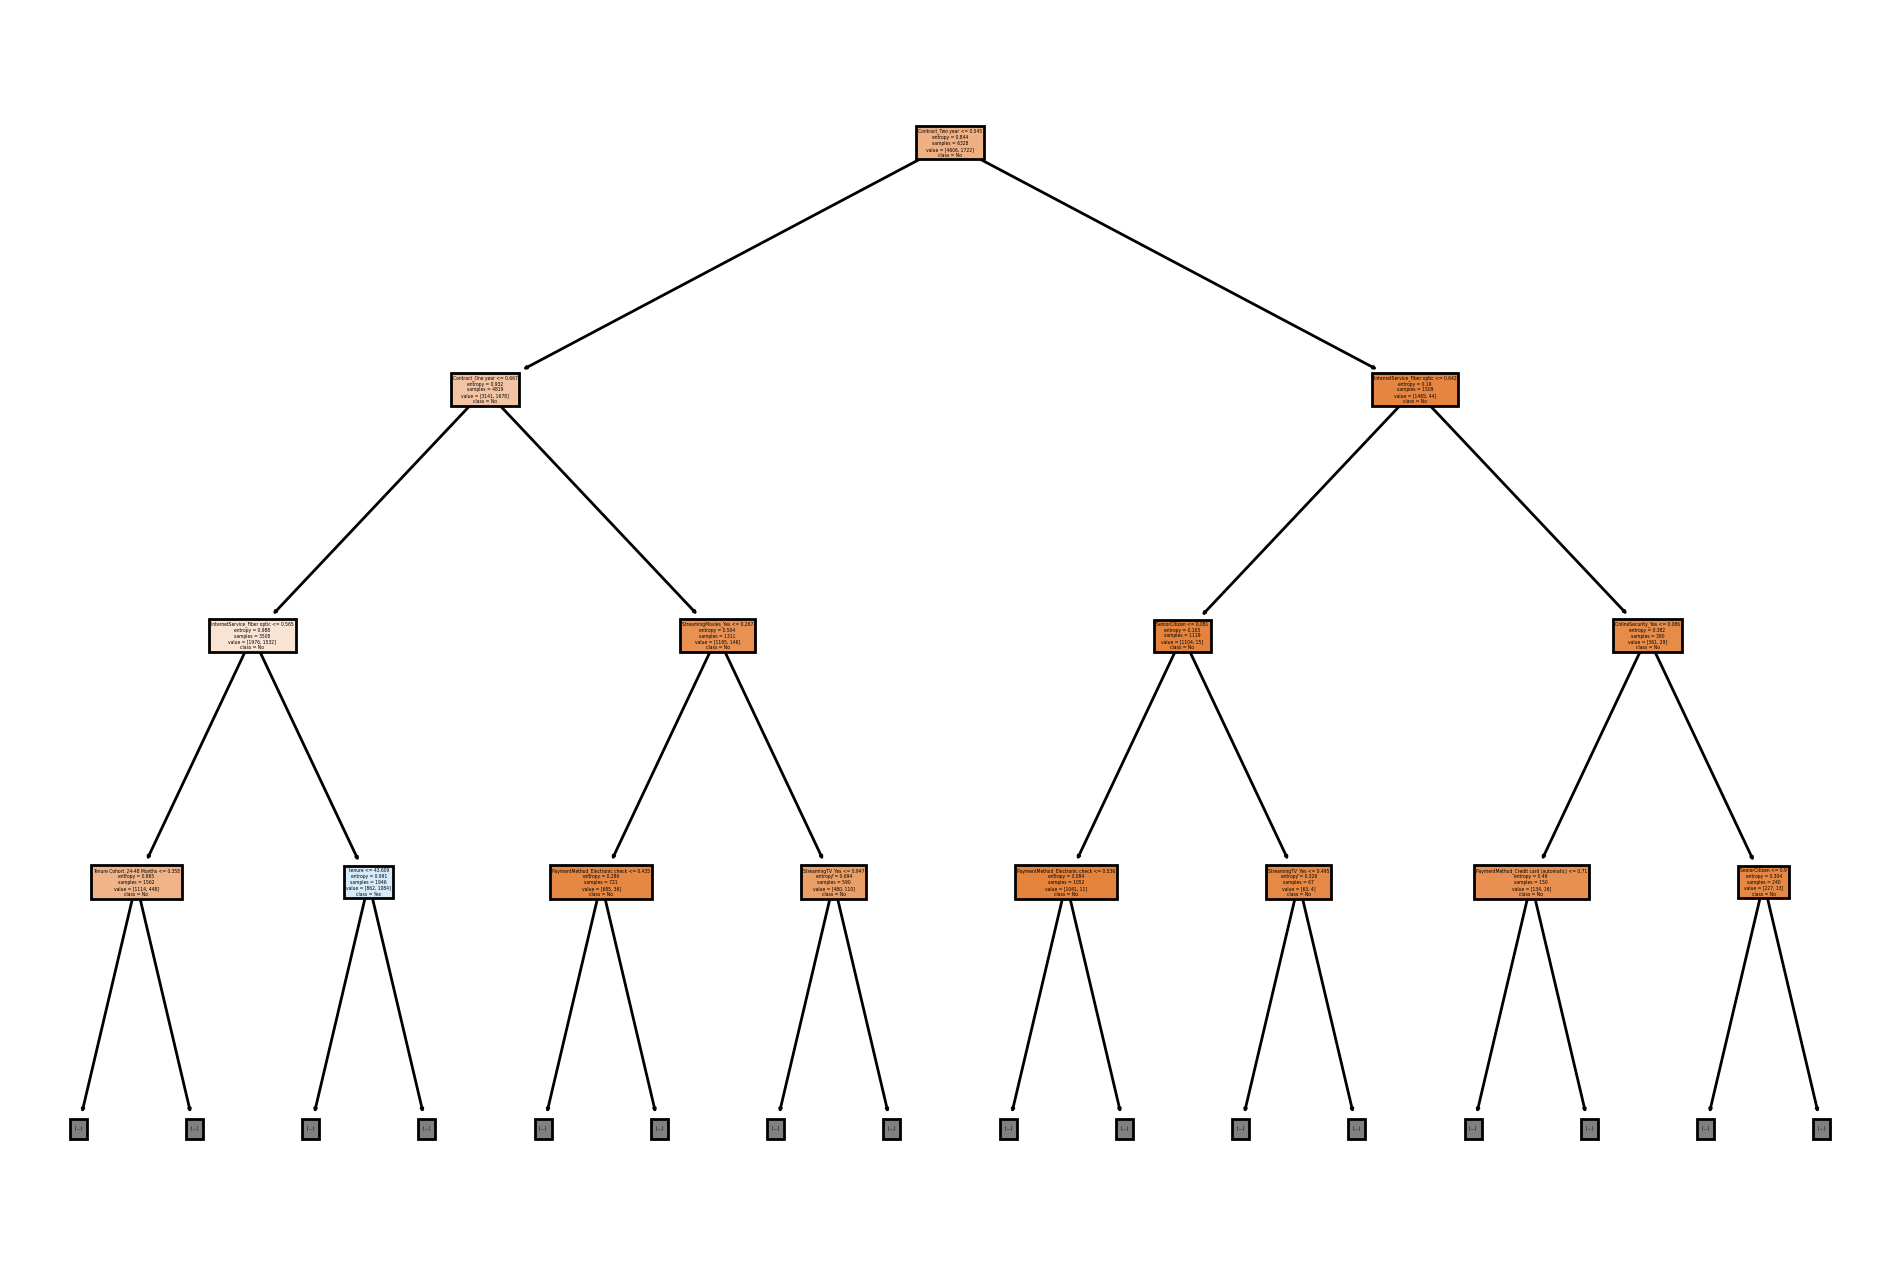

In [42]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(df_model, max_depth=3, feature_names=X.columns, class_names=['No', 'Yes'], filled=True); # increase max_depth to 10 for bigger tree

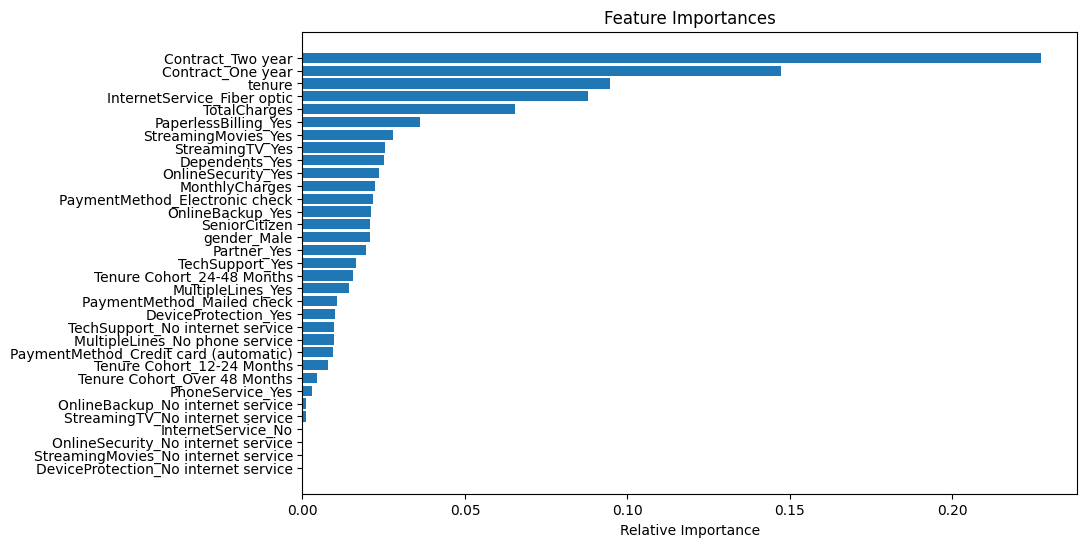

In [43]:
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.gca().invert_yaxis()  # Reverse the order to have the most important at the top
plt.xlabel('Relative Importance')
plt.show()

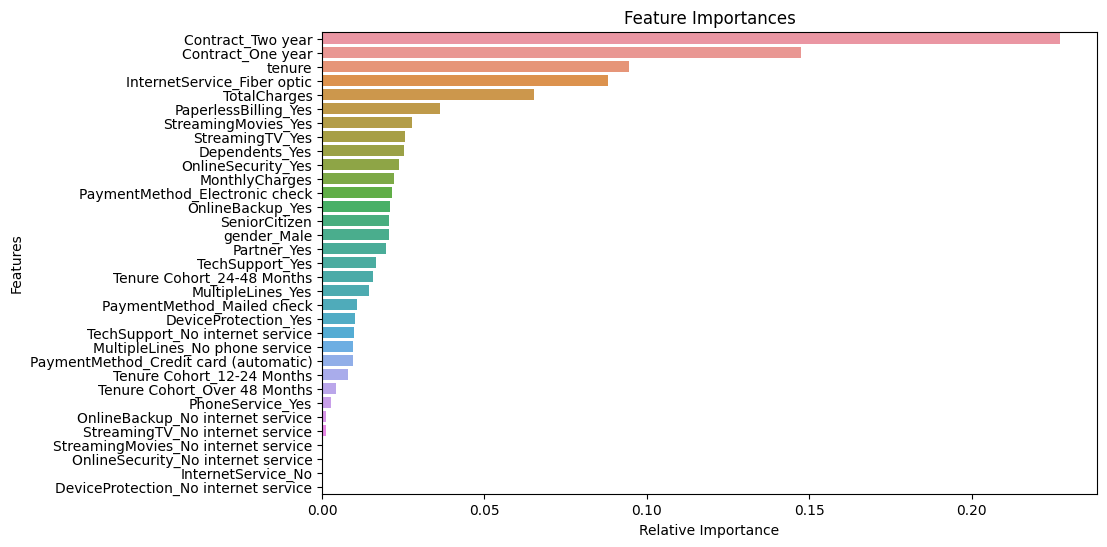

In [44]:
feature_importances_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importances_df, orient='h')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
rf = RandomForestClassifier()

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 30, 60, 90],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [56]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid = param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 30, 60, 90],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [59]:
best_params = grid_search.best_params_
best_params

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [61]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       557
           1       0.62      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



In [65]:
confusion_matrix(y_test, y_pred)

array([[512,  45],
       [ 74,  73]])

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
ada = AdaBoostClassifier()

In [74]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

In [75]:
grid_search_ada = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [78]:
grid_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [80]:
best_ada_model = grid_search.best_estimator_

In [82]:
y_pred_ada = best_ada_model.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       557
           1       0.62      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



In [84]:
confusion_matrix(y_test, y_pred_ada)

array([[512,  45],
       [ 74,  73]])

Omat muistiinpanot:

käytä perusmalleja ja valitse niistä muutama. Seuraavalla kierroksella käytä ristikkohakua lopullisen mallin valintaan.

Tässä tapauksessa joko adaboost tai random forest. Molemmat saivat samat testitulokset.